In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc
from sklearn.preprocessing import StandardScaler

In [4]:
dados = pd.read_excel('DADOS_DESAFIO.xlsx', sheet_name='DADOS')
dados.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,2,0,1,1,1,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1
1,2,3,1,0,0,0,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0
2,3,3,0,1,1,1,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1
3,4,1,1,1,1,0,6.4,3.3,7.0,3.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0
4,5,2,0,1,0,1,9.0,3.4,5.2,4.6,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0


In [5]:
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = dados[['X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
y = baseline_df.X4
X = pd.get_dummies(baseline_df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']], drop_first=True)

In [6]:
print(X)

      X6   X7   X8   X9  X10  X11  X12  X13  X14  X15  X16  X17  X18
0    8.5  3.9  2.5  5.9  4.8  4.9  6.0  6.8  4.7  4.3  5.0  5.1  3.7
1    8.2  2.7  5.1  7.2  3.4  7.9  3.1  5.3  5.5  4.0  3.9  4.3  4.9
2    9.2  3.4  5.6  5.6  5.4  7.4  5.8  4.5  6.2  4.6  5.4  4.0  4.5
3    6.4  3.3  7.0  3.7  4.7  4.7  4.5  8.8  7.0  3.6  4.3  4.1  3.0
4    9.0  3.4  5.2  4.6  2.2  6.0  4.5  6.8  6.1  4.5  4.5  3.5  3.5
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
195  7.6  3.6  2.1  5.2  4.8  6.6  5.4  4.4  4.3  6.8  4.4  3.9  4.0
196  5.9  4.0  3.3  7.8  3.3  5.9  6.2  8.4  5.2  6.6  6.0  7.5  5.4
197  9.7  5.0  7.9  6.3  5.3  7.6  6.1  6.8  6.6  5.2  4.4  3.5  4.2
198  5.5  5.5  6.9  6.6  6.5  5.7  8.2  6.3  7.0  5.3  5.9  6.7  4.9
199  9.7  5.0  5.6  5.9  5.3  7.6  6.1  6.8  6.9  1.2  4.3  3.5  4.2

[200 rows x 13 columns]


In [7]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [8]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(x_treino)
x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

pca = PCA(.95)
pca.fit(x_treino)
x_treino = pca.transform(x_treino)
x_teste = pca.transform(x_teste)

In [10]:
logisticRegr = LogisticRegression(solver = 'newton-cg')
logisticRegr.fit(x_treino, y_treino)
logisticRegr.predict(x_teste)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [11]:
logisticRegr.score(x_teste, y_teste)

0.825

In [12]:
logisticRegr.coef_

array([[-0.58428306,  1.59620159, -0.22830652, -0.73369374, -0.48168227,
         0.26282357,  0.07546832, -0.1581959 , -0.14338164]])

In [13]:
yhat = logisticRegr.predict_proba(x_teste)
yhat = yhat[:, 1]

In [19]:
print(classification_report(y_teste, logisticRegr.predict(x_teste)))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.85      0.81      0.83        21

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



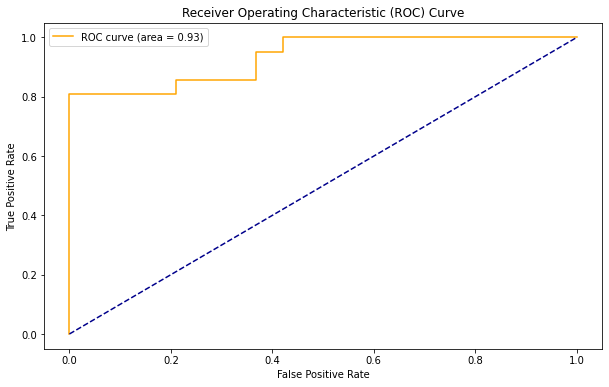

In [15]:
plot_roc_curve(y_teste, yhat)